In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import matplotlib

In [2]:
artist=pd.read_csv('C:/Users/lll/Desktop/artist_data.csv', low_memory=False, delimiter=",", encoding='utf-8')
artwork=pd.read_csv('C:/Users/lll/Desktop/artwork_data.csv', low_memory=False, delimiter=",", encoding='utf-8')

In [3]:
del artist['url']
artist.head()

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom"
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States"
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom"
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN


In [4]:
del artwork['url']
del artwork['thumbnailUrl']
artwork.head()

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN


### Research 1

I want to study the relationship between the size of the work and the time. I need to multiply the data of length and width of the work and then correlate it with time to make a scatter plot

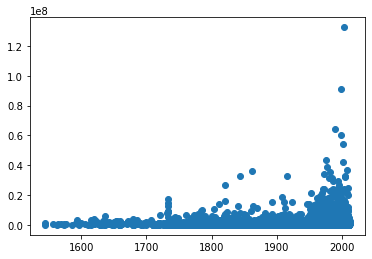

In [76]:
width=artwork['width'].values
height=artwork['height'].values
year=artwork['year'].values

data=[]
years=[]
for i in range(len(width)):
    try:
        if width[i] == float('nan') or height[i] == float('nan') or year[i] == float('nan'):
            continue
        t=float(year[i])
        data.append(float(width[i]) * float(height[i]))
        years.append(float(year[i]))
    except:
        pass
    
plt.scatter(years,data)
plt.show()

The image shows how artwork has grown in size over the course of history. Some very large paintings appeared around the year 2000. This is also closely related to the development of technology and art.

### Research 2

I want to study the change in the number of male and female artists over the years

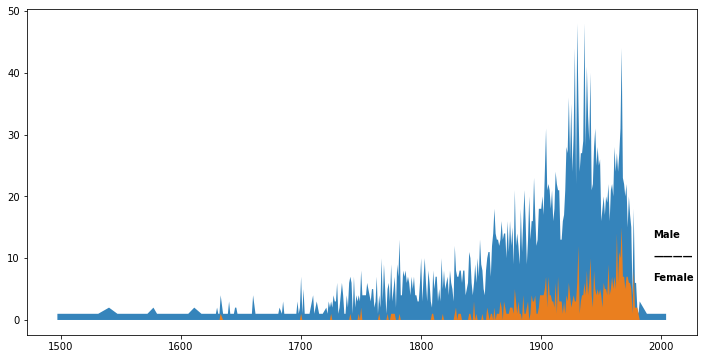

In [75]:
data_sub = artist.groupby('gender')['yearOfBirth'].value_counts().unstack().fillna(0).loc[['Female','Male']].cumsum(axis=0).T
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for f,m  in enumerate(artist['gender'].value_counts().index):
    m_rel = data_sub[m]
    ax.fill_between(m_rel.index, 0, m_rel, label=m,alpha=0.9)


fig.text(0.85,0.35,"Male", fontweight="bold")
fig.text(0.85,0.3,"————", fontweight="bold", color='black')
fig.text(0.85,0.25,"Female", fontweight="bold")

plt.show()

From the graph we can see that the number of artists has been gradually increasing since 1700. The number of male artists has always been much larger than the number of female artists, who remained at a very low number until 1850 and began to increase significantly in the last 100 years, reaching a peak around 1970

### Research 3

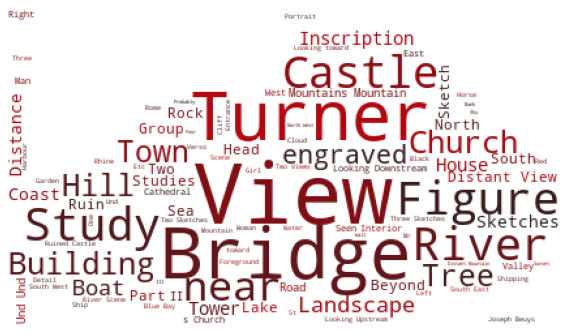

In [73]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(artwork['title'])).replace(':', '').replace('title','').replace(',', '').replace("'", '').replace('.', '').replace('Blank','').replace('known','').replace('blank','')
mask = np.array(Image.open('C:/Users/lll/Desktop/cloud.png'))
wordcloud = WordCloud(background_color = 'white',colormap=cmap, max_words = 100, mask = mask).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

I use word clouds to analyze the titles of artworks, using them to examine what the main themes of the works are. The words that appear more frequently are View, Bridge, and Turner, indicating that many of the works are paintings of landscapes, as well as works that show worker at work.